# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/train.zip'

# Destination directory where you want to extract the files
extracted_dir_path = '/content/train'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Files extracted successfully:", extracted_files)


Files extracted successfully: ['train', '__MACOSX']


In [ ]:
extracted_files

['train', '__MACOSX']

In [3]:
import os
import csv
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Sequential


In [4]:
data_dir = "/content/train/train"

# Load images and labels directly into numpy arrays

In [13]:
# Load images and labels directly into numpy arrays
X = []
y = []

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir) and label in ['gls', 'nlb', 'nls']:
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            # Check if the file is an image
            if image_file.endswith(('.png', '.jpg', '.jpeg')):
                image = Image.open(image_path)
                image = image.resize((256, 256))
                image = np.array(image) / 255.0
                X.append(image)
                y.append(label)

X = np.array(X)
y = np.array(y)

In [14]:
X

array([[[[0.80392157, 0.77254902, 0.76078431],
         [0.80784314, 0.77254902, 0.76470588],
         [0.8       , 0.76470588, 0.75686275],
         ...,
         [0.60392157, 0.59607843, 0.60392157],
         [0.63529412, 0.62745098, 0.63529412],
         [0.63137255, 0.62352941, 0.63137255]],

        [[0.81960784, 0.78431373, 0.76470588],
         [0.83921569, 0.8       , 0.78431373],
         [0.82745098, 0.79215686, 0.77254902],
         ...,
         [0.57647059, 0.56862745, 0.57254902],
         [0.59215686, 0.58431373, 0.58823529],
         [0.58823529, 0.58039216, 0.58431373]],

        [[0.83529412, 0.80392157, 0.75686275],
         [0.85098039, 0.81960784, 0.78039216],
         [0.85882353, 0.82352941, 0.79607843],
         ...,
         [0.5372549 , 0.52941176, 0.53333333],
         [0.56470588, 0.55686275, 0.56078431],
         [0.55686275, 0.54901961, 0.55294118]],

        ...,

        [[0.45490196, 0.44705882, 0.45098039],
         [0.4627451 , 0.45490196, 0.45882353]

In [16]:
len(X)

786

In [17]:
len(y)

786

# Encode labels

In [18]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
len(X_train)

628

In [20]:
len(y_train)

628

In [21]:
len(y_test)

158

In [22]:
len(X_test)

158

# Define model

In [52]:
from keras.optimizers import Adam

# Define model
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Define optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.01)
# Compile model
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)


In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 131072)            0         
                                                                 
 dense_17 (Dense)            (None, 64)                8388672   
                                                                 
 dense_18 (Dense)            (None, 3)                 195       
                                                                 
Total params: 31976579 (121.98 MB)
Trainable params: 8388867 (32.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


# Train the model

In [54]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
20/20 [==============================] - 8s 230ms/step - loss: 84.3864 - accuracy: 0.3774 - val_loss: 73.0098 - val_accuracy: 0.4304
Epoch 2/15
20/20 [==============================] - 3s 149ms/step - loss: 29.4512 - accuracy: 0.4188 - val_loss: 21.7023 - val_accuracy: 0.4051
Epoch 3/15
20/20 [==============================] - 3s 151ms/step - loss: 12.9039 - accuracy: 0.5287 - val_loss: 4.7192 - val_accuracy: 0.6266
Epoch 4/15
20/20 [==============================] - 3s 148ms/step - loss: 6.2025 - accuracy: 0.5828 - val_loss: 13.5056 - val_accuracy: 0.3797
Epoch 5/15
20/20 [==============================] - 3s 151ms/step - loss: 7.7375 - accuracy: 0.5653 - val_loss: 16.3434 - val_accuracy: 0.4873
Epoch 6/15
20/20 [==============================] - 3s 154ms/step - loss: 8.9868 - accuracy: 0.5271 - val_loss: 2.9828 - val_accuracy: 0.6899
Epoch 7/15
20/20 [==============================] - 3s 152ms/step - loss: 3.1808 - accuracy: 0.6815 - val_loss: 2.7060 - val_accuracy: 0.6772

# Evaluate the model

In [55]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


5/5 [==============================] - 1s 119ms/step - loss: 1.0040 - accuracy: 0.7785
Test Loss: 1.004010558128357
Test Accuracy: 0.7784810066223145


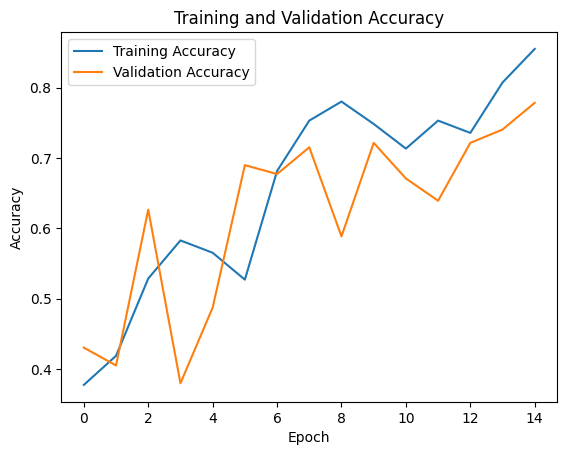

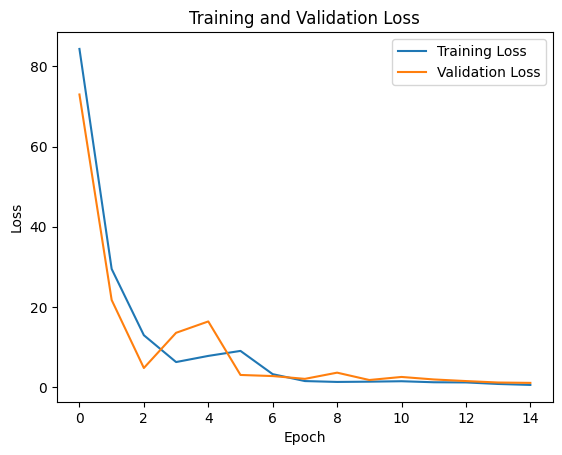

In [56]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot confusion matrix

5/5 [==============================] - 2s 131ms/step


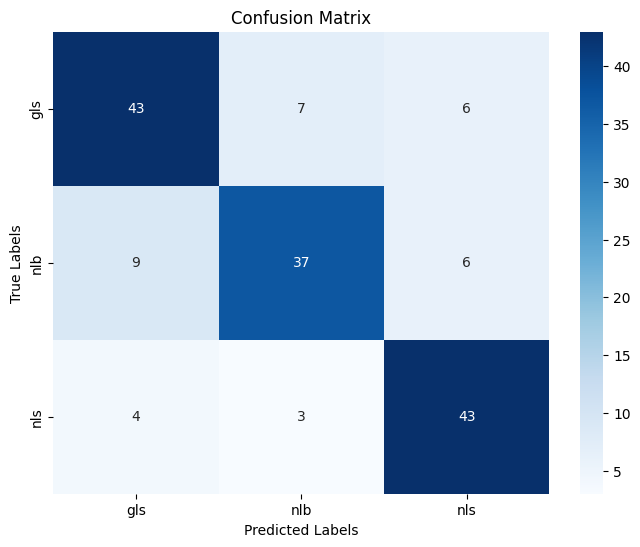

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['gls', 'nlb', 'nls'],
            yticklabels=['gls', 'nlb', 'nls'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# classification report

In [58]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred_classes, target_names=['gls', 'nlb', 'nls'])

# Print classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         gls       0.77      0.77      0.77        56
         nlb       0.79      0.71      0.75        52
         nls       0.78      0.86      0.82        50

    accuracy                           0.78       158
   macro avg       0.78      0.78      0.78       158
weighted avg       0.78      0.78      0.78       158



# predictions

In [59]:
# Select some samples from the test set
num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
X_sample = X_test[sample_indices]
y_true = y_test[sample_indices]

# Make predictions
y_pred = model.predict(X_sample)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert class indices to class labels
class_labels = ['gls', 'nlb', 'nls']
y_pred_labels = [class_labels[idx] for idx in y_pred_classes]
y_true_labels = [class_labels[idx] for idx in y_true]

# Print predicted and true values
print("Predicted Labels:", y_pred_labels)
print("True Labels:", y_true_labels)


1/1 [==============================] - 0s 48ms/step
Predicted Labels: ['nls', 'nlb', 'nlb', 'nlb', 'nlb', 'nlb', 'gls', 'nlb', 'gls', 'gls']
True Labels: ['nls', 'nlb', 'nlb', 'gls', 'nlb', 'nlb', 'gls', 'gls', 'gls', 'gls']
